# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [203]:
# Import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from scipy.stats import normaltest, uniform, norm, bernoulli, binom, geom, poisson

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [77]:
# Your code here
mean=50
standard_deviation=5
sample_size=[10, 50, 500, 5000]
lst_pvalues = []

#Probamos con 4 distribuciones normales
for ind,elem in enumerate(sample_size):
    #Definimos la normal que se va a representar.
    data_normal = norm.rvs(size=elem,loc=mean,scale=standard_deviation)
    k2, p = normaltest(data_normal)
    lst_pvalues.append(p)

# 1 distribución uniforme
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc=start, scale=width)
k2, p = normaltest(data_uniform)
lst_pvalues.append(p)

# Y una distribución random.normal
pts = 1000
np.random.seed(28041990)
a = np.random.normal(0, 1, size=pts)
b = np.random.normal(2, 1, size=pts)
x = np.concatenate((a, b))
k2, p = normaltest(x)
lst_pvalues.append(p)

print(lst_pvalues)

[0.3443656944309248, 0.22465832386265094, 0.7457120490762718, 0.2893124755121542, 0.0, 3.272068585132838e-11]


## null hypothesis: x comes from a normal distribution

    - p < alpha: Reject Ho    --> No es similar a una distribución normal
    - p > alpha: NO Reject Ho --> Similar a una distribución normal
    

In [80]:
alpha = 0.05
for p in lst_pvalues:
    if p < alpha:  
         print(f"{p} < {alpha}: The null hypothesis can be rejected (No se asume normal)")
    else:
         print(f"{p} > {alpha}: The null hypothesis cannot be rejected (Se puede asumir normal)")

0.3443656944309248 > 0.05: The null hypothesis cannot be rejected (Se puede asumir normal)
0.22465832386265094 > 0.05: The null hypothesis cannot be rejected (Se puede asumir normal)
0.7457120490762718 > 0.05: The null hypothesis cannot be rejected (Se puede asumir normal)
0.2893124755121542 > 0.05: The null hypothesis cannot be rejected (Se puede asumir normal)
0.0 < 0.05: The null hypothesis can be rejected (No se asume normal)
3.272068585132838e-11 < 0.05: The null hypothesis can be rejected (No se asume normal)


#### Interpret the normaltest results and make your observations.

In [81]:
# Explain the test results here
#Only when the result of the pvalue is greater than alpha, the Ho cannot be rejected.

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

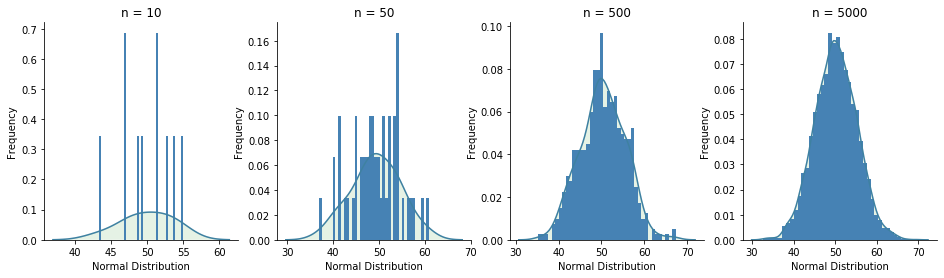

In [84]:
# Your code here

mean=50
standard_deviation=5
sample_size=[10, 50, 500, 5000]

data=[]

# Para pintar el plot y los subplots
f, axes = plt.subplots(nrows=1, ncols=len(sample_size), figsize=(16, 4))

#Elimina los frames de las gráficas
sns.despine(right=True) #Left=True

#Representamos los 4 sample_sizes
for ind,elem in enumerate(sample_size):
    
    #Definimos la normal que se va a representar.
    data_normal = norm.rvs(size=elem,loc=mean,scale=standard_deviation)
    data.append(data_normal)
    
    #Selecciona el eje (ind)
    plt.sca(axes[ind])
    plt.title(f'n = {elem}')
    ax = sns.distplot(data_normal,
                      bins=40,
                      color='steelblue',
                      hist_kws={"linewidth": 20,'alpha':1})
    #Para pintar la sombra.
    ax = sns.kdeplot(data_normal,color="g",shade=True, alpha=0.1)
    ax.set(xlabel='Normal Distribution', ylabel='Frequency')


In [83]:
#En data hemos guardado las distribuiciones normales de n=10,50,500,5000
print(len(data))

4


#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
# Your comment and explanation here
# When independent random variables are added, their properly normalized sum tends toward a normal distribution.
# Thats why, when we increase the number of samples, the normal distribution can be clearly identified.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

[ 9  9 13 ...  8  3 15]


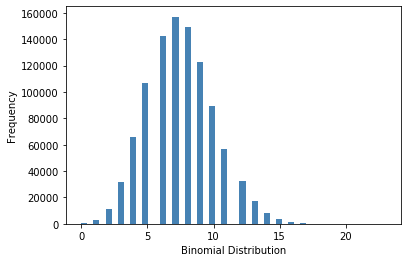

In [195]:
# Your code here
data_binom = binom.rvs(n=50,p=0.15,size=1000000)
print(data_binom)
ax = sns.distplot(data_binom,
                  color='steelblue',
                  kde=False,
                  bins=50,
                  hist_kws={"linewidth": 10,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency');

In [ ]:
# Your code here
n = 5
p = 0.15
x = range(n)
data_binom = binom.pmf(x,n,p)
print(data_binom)
plt.plot(data_binom,"*-")
plt.xlabel(f"n = {n}")
plt.ylabel("Frecuencia");

#### Explain what you observe from the plot above

In [182]:
# Your comment here
# Out of five. 
    ## 0 will click the add in the 45% of times.
    ## 1 -- 40%
    ## 2 -- 15%
    ## 3 -- 5%
    ## 4 -- Almost 0
    ## 5 -- No way..

#### Now plot PMF with 50, 500, and 5000 visitors.

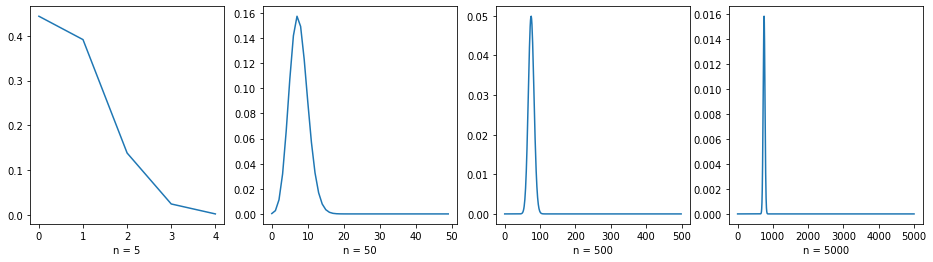

In [198]:
# Your code here
n = [5,50,500,5000]
p = 0.15

f, axs = plt.subplots(1,4,figsize=(16,4))

for ind,elem in enumerate(n):
    plt.sca(axs[ind])
    x = range(elem)
    data_binom = binom.pmf(x,elem,p)
    plt.plot(data_binom)
    plt.xlabel(f"n = {elem}")


#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here
    ## Por el teoréma del limite central. La binomial tiende a ser una distribución normal cuando la muestra es
    ## suficientemente grande. Si pintamos el "rvs", se entiende mejor.

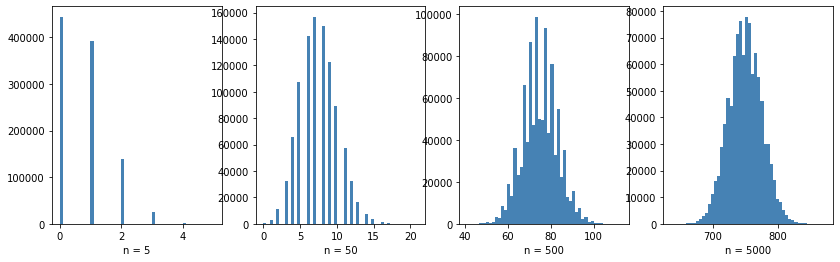

In [202]:
n = [5,50,500,5000]
f, axs = plt.subplots(1,4,figsize=(14,4))
for ind,elem in enumerate(n):
    plt.sca(axs[ind])
    data_binom = binom.rvs(n=elem,p=0.15,size=1000000)
    ax = sns.distplot(data_binom,
                      color='steelblue',
                      kde=False,
                      bins=50,
                      hist_kws={"linewidth": 10,'alpha':1})
    ax.set(xlabel=f'n = {elem}');

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [204]:
# Your comment here
    ## Se utliza para discretizar eventos continuos relacionados con un valor medio = lambda (= varianza).
    ## Con esta distribución podemos establecer escenarios y calcular probabilidades fuera de la media.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [215]:
# Your code here
#fig, ax = plt.subplots(1, 1)
mu = 300
k = 320
res = poisson.pmf(k, mu, loc=0)
print(f"p(k={k}) =",res*100,"%")

p(k=320) = 1.1612348610402474 %


#### What is the probability of getting 60 visits?

In [235]:
# Your code here
k = 60
res = poisson.pmf(k, mu, loc=0)
print(f"p(k={k}) =",res*100,"%")
if res < 0.000001:
    print("Es prácticamente 0")

p(k=60) = 2.622743762294515e-62 %
Es prácticamente 0


#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

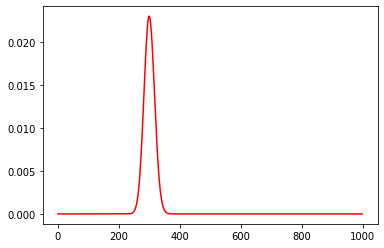

In [234]:
# your code here
mu = 300
k = np.arange(0,1000)
lst_res=[]
for i in k: 
    res = poisson.pmf(i, mu, loc=0)
    lst_res.append(res)

#x= np.arange(0,1000)
#y= lst_res
plt.plot(k, lst_res, '-', color='r');